<a href="https://colab.research.google.com/github/Sreelekha0409/Machine-Learning-and-Techniques/blob/main/Task%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8271 - loss: 0.6321 - val_accuracy: 0.9547 - val_loss: 0.1540
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9528 - loss: 0.1590 - val_accuracy: 0.9690 - val_loss: 0.1048
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9672 - loss: 0.1066 - val_accuracy: 0.9718 - val_loss: 0.0948
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9755 - loss: 0.0799 - val_accuracy: 0.9772 - val_loss: 0.0775
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0550 - val_accuracy: 0.9765 - val_loss: 0.0799

 Test Accuracy: 97.26%


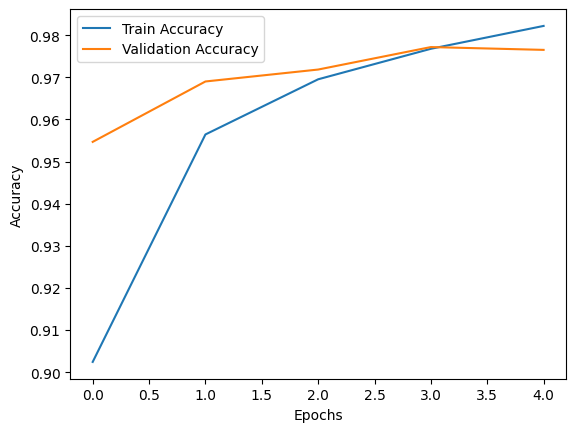

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Predicted Class: 7
True Label: 7


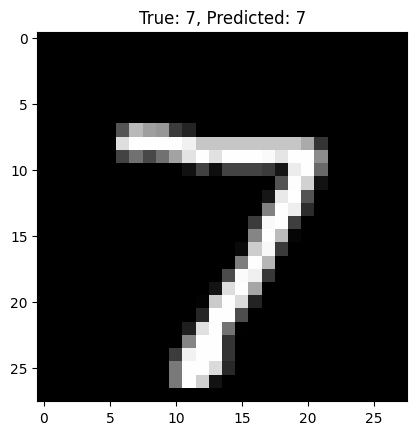

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


X_train = X_train / 255.0
X_test = X_test / 255.0


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=1)


loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


import numpy as np

sample = X_test[0].reshape(1,28,28)
prediction = model.predict(sample)
print("\nPredicted Class:", prediction.argmax())
print("True Label:", y_test[0])

plt.imshow(X_test[0], cmap='gray')
plt.title(f"True: {y_test[0]}, Predicted: {prediction.argmax()}")
plt.show()